In [744]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [745]:
df_calories = pd.read_csv('calories.csv')
df_exercise = pd.read_csv('exercise.csv')

df = df_exercise.merge(df_calories, how='inner')
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [746]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Axes: xlabel='Gender', ylabel='count'>

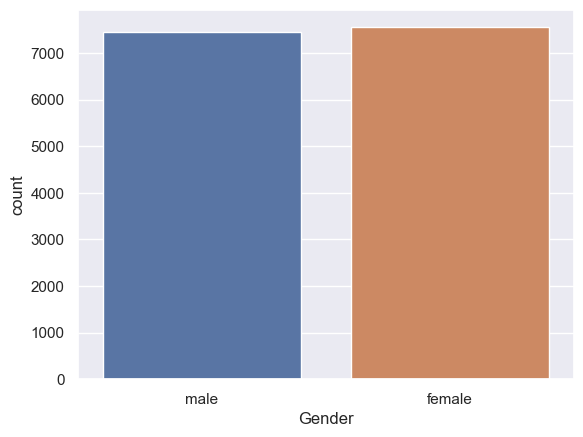

In [747]:
sns.countplot(data=df, x='Gender', hue='Gender')

42.7898


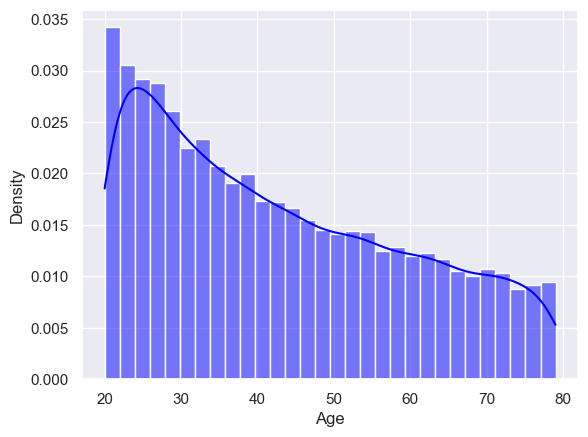

In [748]:
sns.histplot(data=df, x="Age", kde=True, bins=30, stat="density", color="blue", alpha=0.5)
mean_age = df['Age'].mean()
print(mean_age)

<Axes: xlabel='Height', ylabel='Density'>

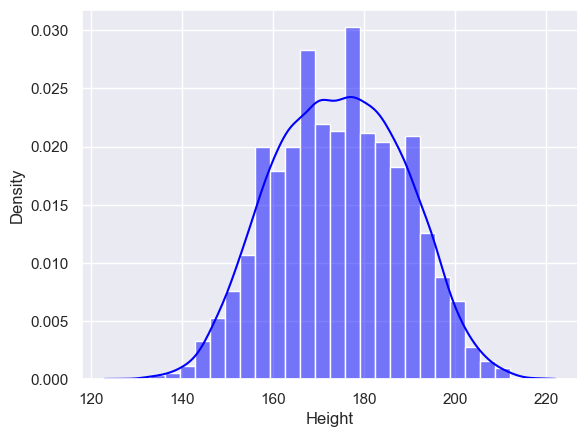

In [749]:
sns.histplot(data=df, x="Height", kde=True, bins=30, stat="density", color="blue", alpha=0.5)

<Axes: xlabel='Weight', ylabel='Density'>

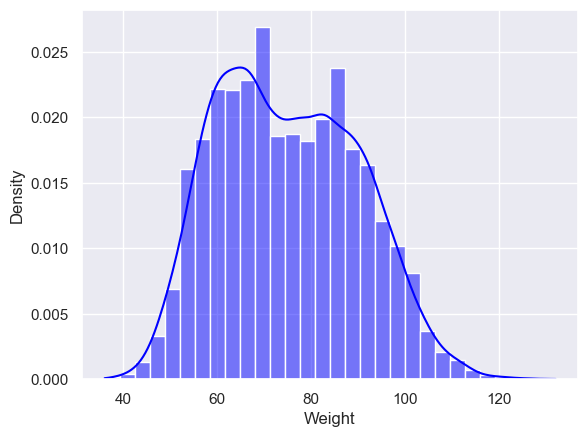

In [750]:
sns.histplot(data=df, x="Weight", kde=True, bins=30, stat="density", color="blue", alpha=0.5)

<Axes: xlabel='Duration', ylabel='Density'>

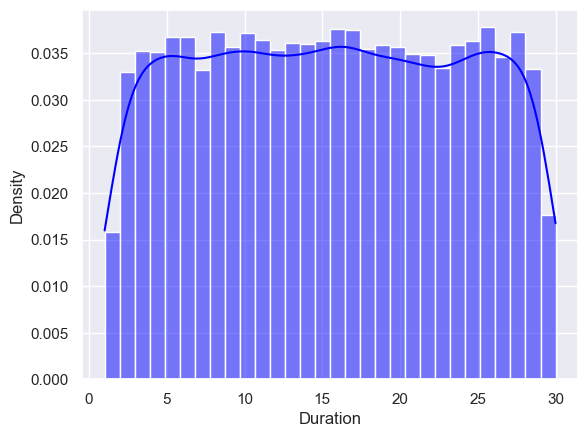

In [751]:
sns.histplot(data=df, x="Duration", kde=True, bins=30, stat="density", color="blue", alpha=0.5)

In [752]:
correlation = df.drop(['Gender'], axis=1).corr()

<Axes: >

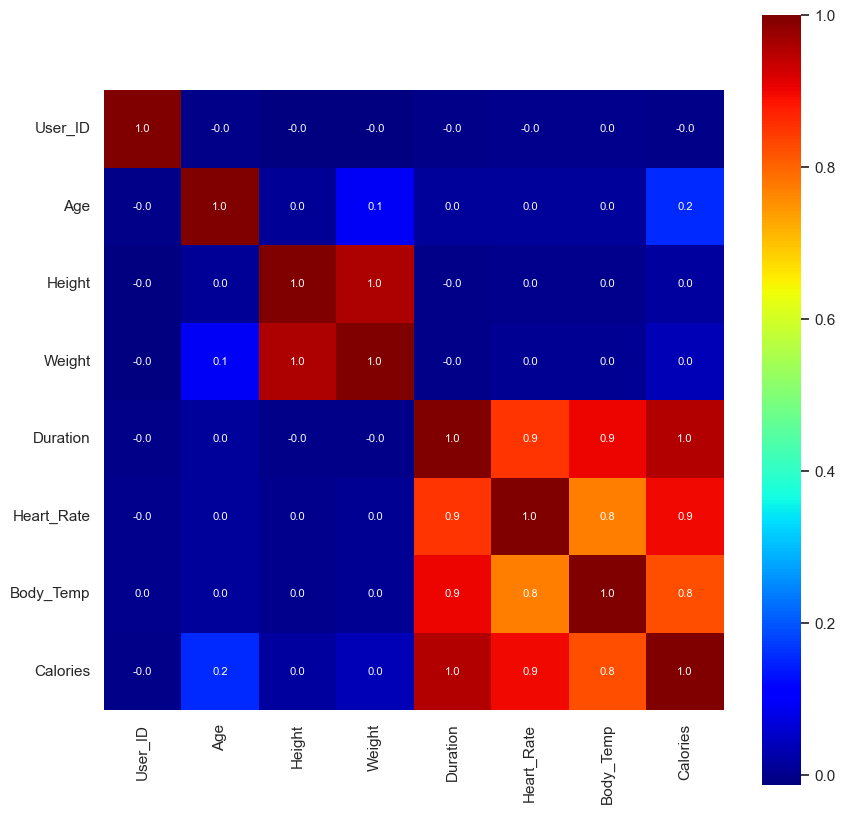

In [753]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap="jet")

In [754]:
df['Gender'] = df['Gender'].map({"male": 1, "female": 0})

In [755]:
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [757]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [758]:
X = df.drop(columns=['User_ID', 'Calories'], axis=1)
y = df['Calories']

In [759]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [760]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [761]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [762]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


train model

In [763]:
model1 = XGBRegressor()

In [764]:
model1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [765]:
#XGBoost
X_train_pred1 = model1.predict(X_train)
X_train_acc_MSE1 = mean_squared_error(X_train_pred1, y_train)
X_train_acc_R2_1 = r2_score(X_train_pred1, y_train)
print(X_train_acc_MSE1)
print(X_train_acc_R2_1)

1.7537951802005933
0.9995492119120033


In [766]:
model2 = LinearRegression()
model2.fit(X_train, y_train)


LinearRegression()

In [767]:
#regression
X_train_pred = model2.predict(X_train)
X_train_acc_MSE = mean_squared_error(X_train_pred, y_train)
X_train_acc_R2 = r2_score(X_train_pred, y_train)
print(X_train_acc_MSE)
print(X_train_acc_R2)

127.92513806765537
0.9659940971217295


predictive system

In [768]:
input_data = X_test.iloc[3] #test cases
input_data_reshaped = input_data.values.reshape(1, -1)  
prediction = model1.predict(input_data_reshaped)
print("Prediction:", prediction)

Prediction: [186.58875]
